In [2]:
library(tidyverse)
library(feather)
library(viridis)
library(tsne)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.5
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: viridisLite


In [3]:
df1 <- read_feather('data/xs1.feather')
df2 <- read_feather('data/xs2.feather')
df3 <- read_feather('data/xs3.feather')

#### Drop scatter channels

In [4]:
df1 <- df1 %>% select(matches('(CD|Ig|HLA).*'))
df2 <- df2 %>% select(matches('(CD|Ig|HLA).*'))
df3 <- df3 %>% select(matches('(CD|Ig|HLA).*'))

In [5]:
pca_ <- prcomp(df1, center=TRUE, scale=TRUE, rank=2)

In [6]:
summary(pca_)

Importance of first k=2 (out of 25) components:
                         PC1    PC2
Standard deviation     2.761 1.7938
Proportion of Variance 0.305 0.1287
Cumulative Proportion  0.305 0.4337

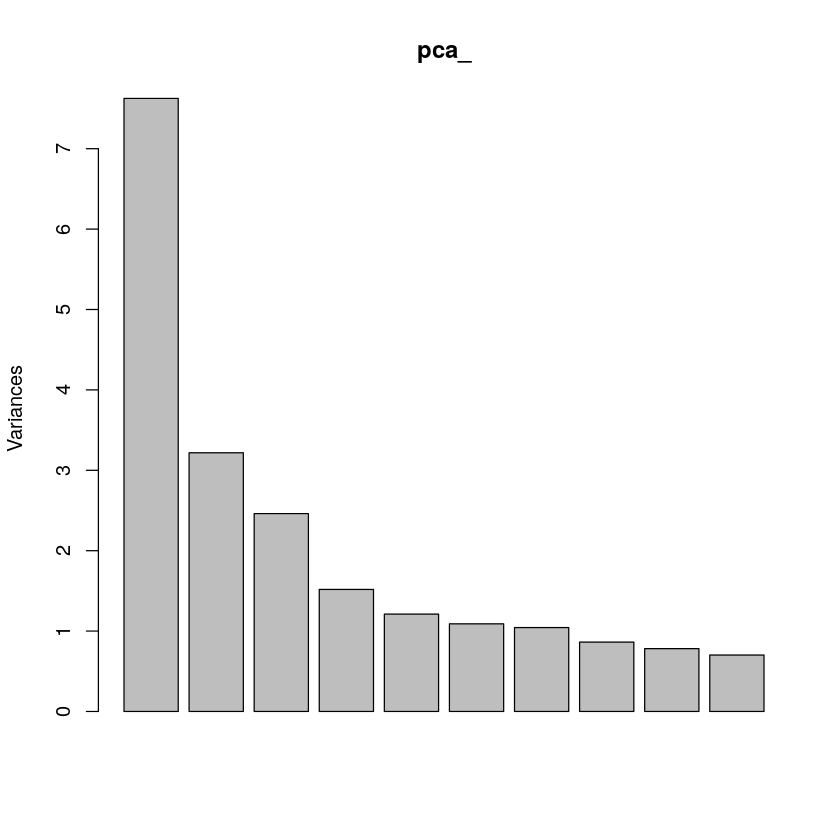

In [7]:
plot(pca_)

In [8]:
pca <- as.data.frame(pca_$x)

In [9]:
head(pca, n=3)

PC1,PC2
-2.390836,-0.36928058
2.581719,-0.81518714
2.135410,0.02164485


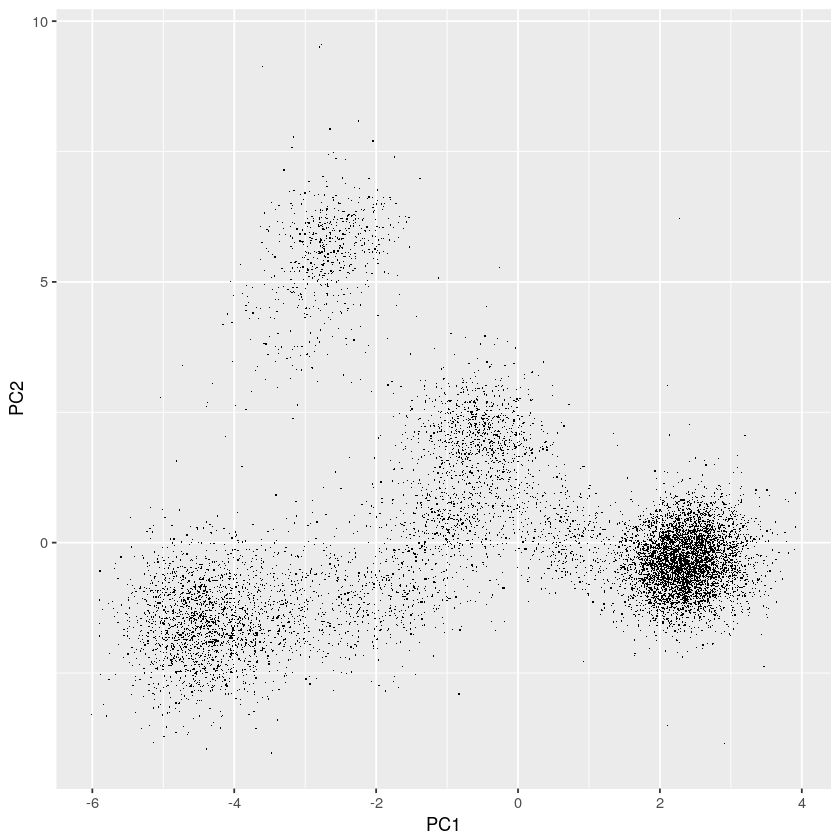

In [10]:
ggplot(pca, aes(x=PC1, y=PC2)) +
geom_point(shape='.')

In [11]:
mds <- as.data.frame(cmdscale(dist(df1[1:1000,]), k = 2))

In [12]:
head(mds, n=3)

V1,V2
6.327020,2.00224283
-4.463275,-0.21284016
-4.010233,-0.02306184


In [13]:
options(repr.plot.width = 4, repr.plot.height = 4)

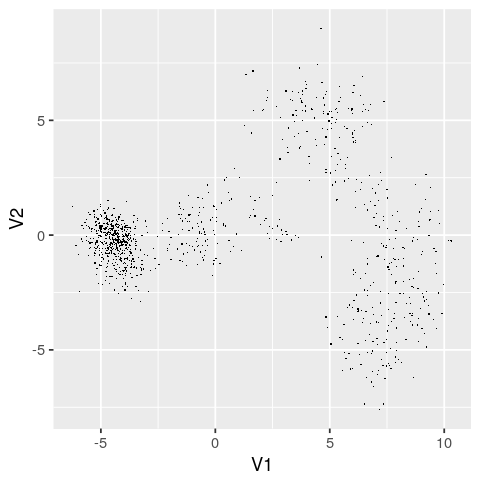

In [14]:
ggplot(mds, aes(x=V1, y=V2)) +
geom_point(shape='.')

In [15]:
df0 <- bind_rows(df1[1:1000,], df2[1:1000,], df3[1:1000,]) 

In [17]:
dim(df0)

[1] 3000   25

In [18]:
tsne0_ <- tsne(df0, k = 2, perplexity = 30)

sigma summary: Min. : 0.304505668513411 |1st Qu. : 0.441224899881033 |Median : 0.531084060711794 |Mean : 0.568105288040718 |3rd Qu. : 0.661192643812885 |Max. : 1.24299124861854 |
Epoch: Iteration #100 error is: 20.1238677401753
Epoch: Iteration #200 error is: 1.88792977438973
Epoch: Iteration #300 error is: 1.61147383535103
Epoch: Iteration #400 error is: 1.4727236187963
Epoch: Iteration #500 error is: 1.40929593368788
Epoch: Iteration #600 error is: 1.37211576251051
Epoch: Iteration #700 error is: 1.34758538052776
Epoch: Iteration #800 error is: 1.33045182064117
Epoch: Iteration #900 error is: 1.31780228186849
Epoch: Iteration #1000 error is: 1.30819502903774


In [31]:
k <- 11
colnames(df0)[k]

[1] "CD19_BUV563"

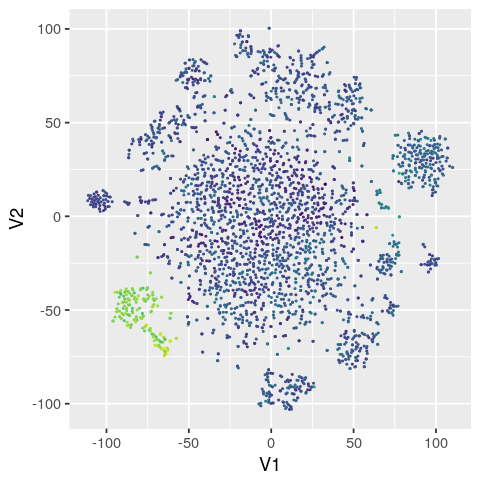

In [35]:
ggplot(as.data.frame(tsne0_), 
       aes(x=V1, y=V2, color=df0[,k])) +
geom_point(size=0.2) + 
scale_color_viridis() +
guides(color=FALSE)